In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

## importing data sets 
from sklearn import datasets 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Iris model**

In [148]:
#key 

iris=datasets.load_iris()
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [149]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [150]:
# csv 
iris_df=iris.data

pd.DataFrame(iris_df)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


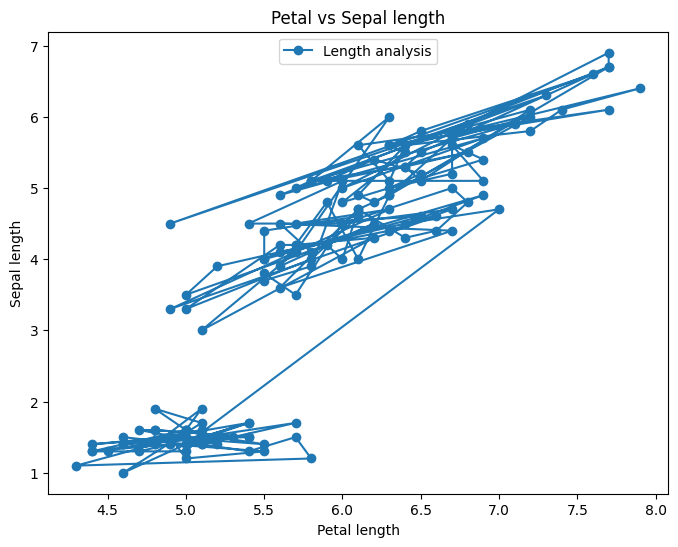

In [154]:
data=iris.data
plt.title("Petal vs Sepal length")


sepalLength=data[:,0]
petalLength=data[:,2]

plt.plot(sepalLength,petalLength,label="Length analysis",marker='o')
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.legend(loc="upper center")

# **Petal and Sepal Length representation in scatter plot**

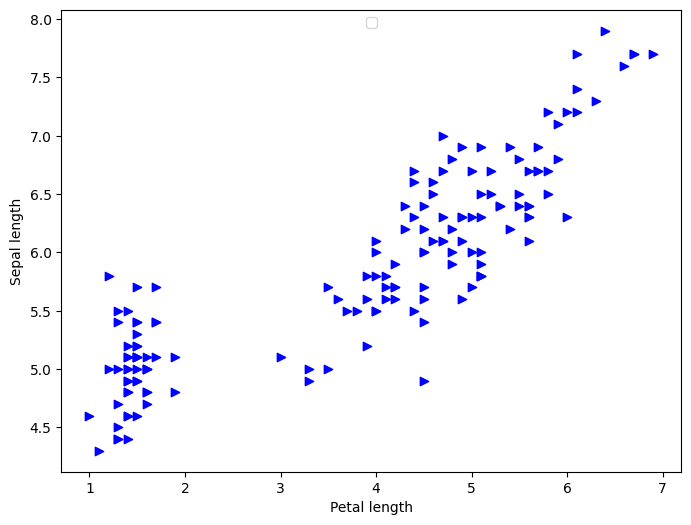

In [158]:
plt.scatter(petalLength,sepalLength,marker=">",c="b")
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.legend(loc="upper center")

* **0** -> setosa
* **1**->versicolor
* **2**->virginica

In [ ]:
iris.target ## label


# **Iris model classification using Logistic Regression**

In [168]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

X=iris.data 
Y=iris.target 
## 75 % for training and 25 % for testing
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42) ## fixed state

## initializing the model
model=LogisticRegression(max_iter=200) ## max_iter (maximum iteration by model to
                                      ## improve iteself)
model.fit(X_train,y_train)

## predicting the target
new_input = np.array([[5.1, 4.5, 2.4, 5.2]])  # Example input (sepal & petal values)
prediction = model.predict(new_input)
print("Predicted class:", iris.target_names[prediction[0]])

## checking model's accuracy 
y_pred=model.predict(X_test) ## predicting using test data 
accuracy=accuracy_score(y_test,y_pred)
print("Model accuracy: ",accuracy)


Predicted class: virginica
Model accuracy:  1.0


# **Wine Dataset** 

In [176]:
from sklearn.datasets import load_wine
wine=load_wine()


In [177]:
## data keys
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [187]:
## feature_names
print(wine.feature_names,"\n")

print("total features->",len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

total features-> 13


In [182]:
wine.data[:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

In [180]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [188]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# **Wine model**

In [205]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=wine.data
Y=wine.target
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## initializing wine model 
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train) ## model learns from the trained data

input=np.array([[1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.2840e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])
prediction=model.predict(input)
print("Predicted class",prediction)

y_predict=model.predict(X_test)
accuracy=accuracy_score(y_test,y_predict) ## getting accuracy score of model 
print("Accuracy score : ",accuracy)



Predicted class [0]
Accuracy score :  1.0


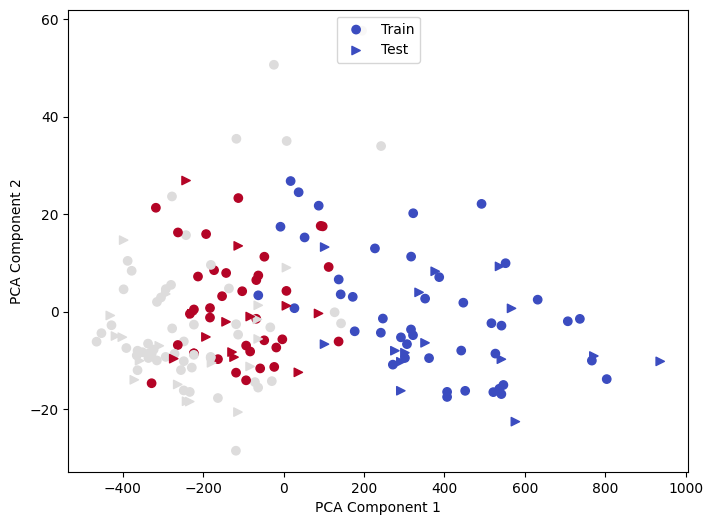

In [210]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', marker='o', label="Train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='>', label="Test")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc="upper center")
plt.show()
